<a href="https://colab.research.google.com/github/kushh18/Internships/blob/main/Uberdataanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('uberdataset.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [4]:
total = df.isnull().sum().sort_values(ascending =False)
total.head(20)

PURPOSE*       503
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
START_DATE*      0
MILES*           0
dtype: int64

In [5]:
df.dropna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df.shape

(1156, 7)

In [8]:
df = df[df['PURPOSE*'].notna()]
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


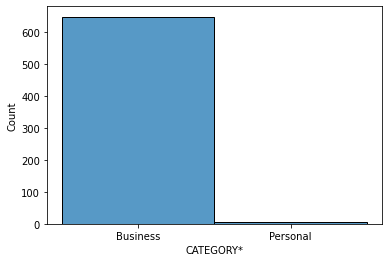

In [9]:
sns.histplot(data=df, x = 'CATEGORY*' )

**As one can see almost all uber rides have one reason that is business, very less people took uber for personal reasons**

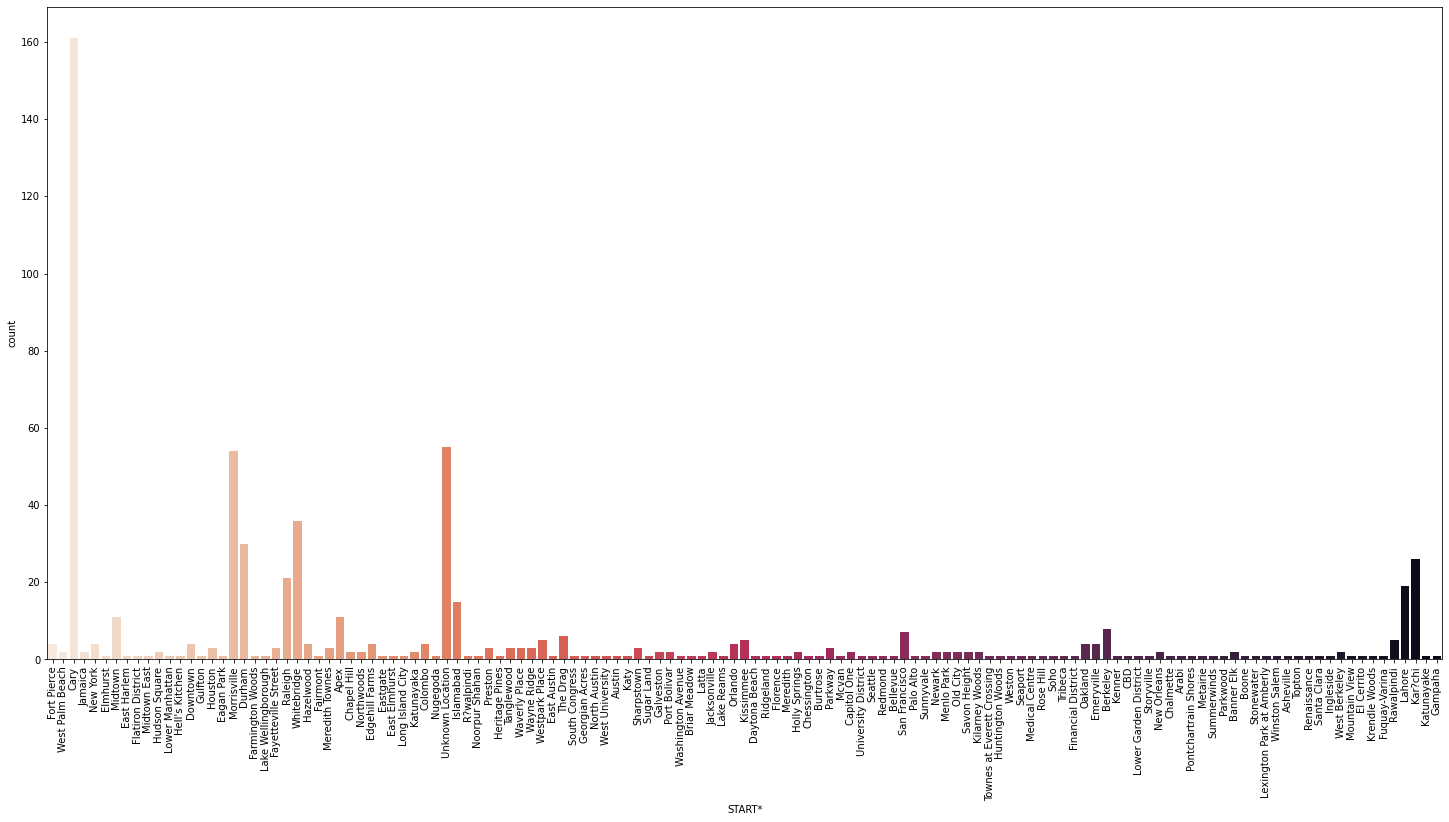

In [11]:
plt.figure(figsize=(25,12))
sns.countplot(x='START*',data=df,palette='rocket_r')
order=df['START*'].value_counts().index
plt.xticks(rotation=90)
plt.show()


In [13]:
df['START*'].value_counts().head(20)


Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Midtown              11
Berkeley              8
San Francisco         7
The Drag              6
Kissimmee             5
Westpark Place        5
Rawalpindi            5
Colombo               4
Oakland               4
Emeryville            4
Name: START*, dtype: int64

In [17]:
df['START*'].value_counts().tail(5)

Lower Manhattan    1
Lake Reams         1
Latta              1
Briar Meadow       1
Gampaha            1
Name: START*, dtype: int64

**By this we can analyse that most ubers have been requested from Cary, followed by Morrisville, and then Whitebridge and so on**

**But the least ubers have been requested from Gampaha, Briar Meadow, Lower Manhattan and so on.. **

Now we can focus more on regulation of uber rides at the locations where engagement is more.

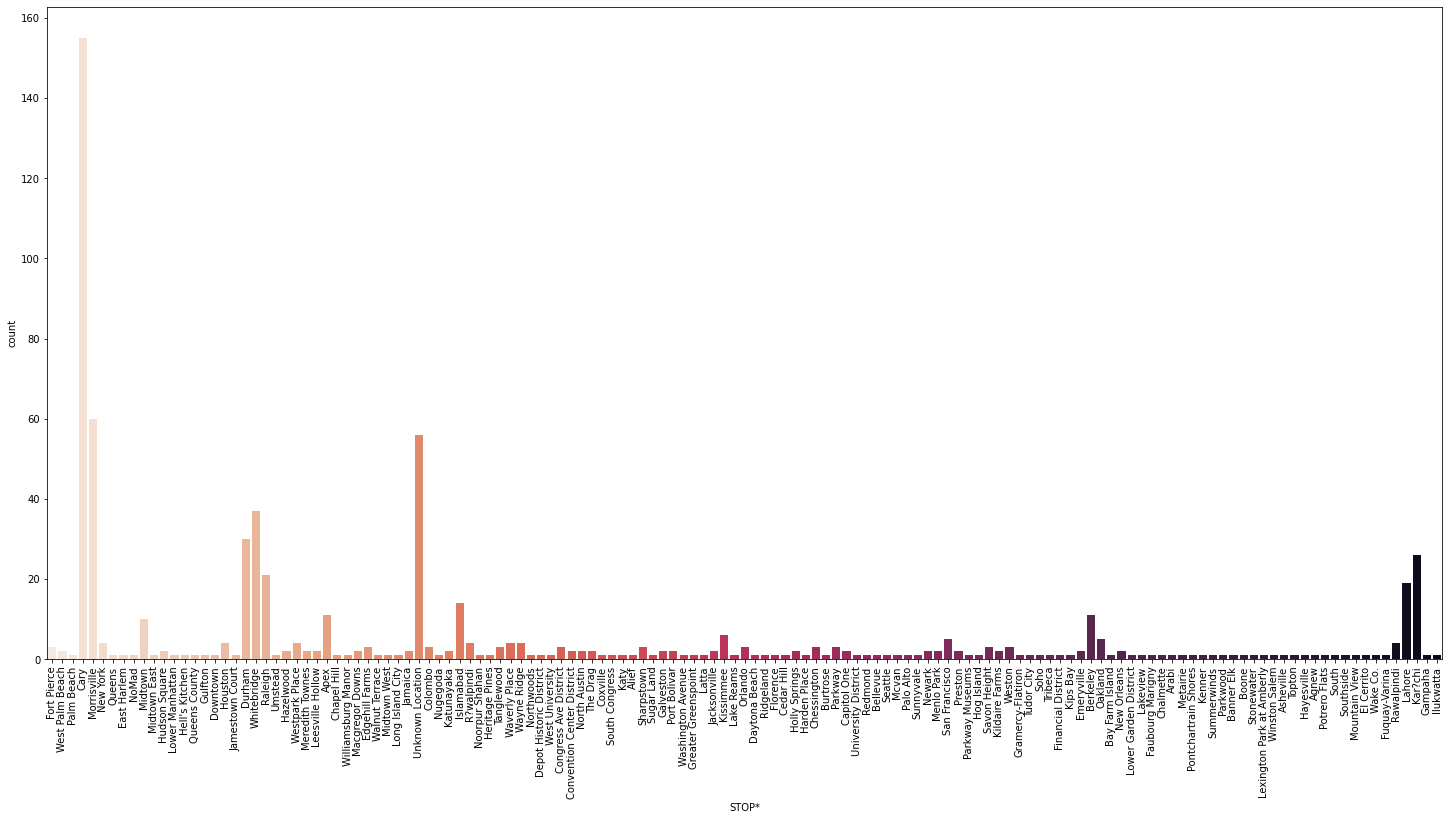

In [18]:
plt.figure(figsize=(25,12))
sns.countplot(x='STOP*',data=df,palette='rocket_r')
order=df['STOP*'].value_counts().index
plt.xticks(rotation=90)
plt.show()

In [19]:
df['STOP*'].value_counts().head(20)

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Apex                 11
Berkeley             11
Midtown              10
Kissimmee             6
Oakland               5
San Francisco         5
Waverly Place         4
R?walpindi            4
Wayne Ridge           4
Houston               4
Westpark Place        4
Name: STOP*, dtype: int64

In [21]:
df['STOP*'].value_counts().tail(10)

University District    1
Queens County          1
Burtrose               1
Gulfton                1
Harden Place           1
Cedar Hill             1
Florence               1
Ridgeland              1
Daytona Beach          1
Ilukwatta              1
Name: STOP*, dtype: int64

Here even the stops have been at mostly at Cary, Morriville and Whitebridge, this proves that the first several locations have the most engagement in requesting Ubers

Now the destination/stop has changed from the previous analysis of Start points namely Ilukwatta, Daytona Beach, Ridgeland and so on  

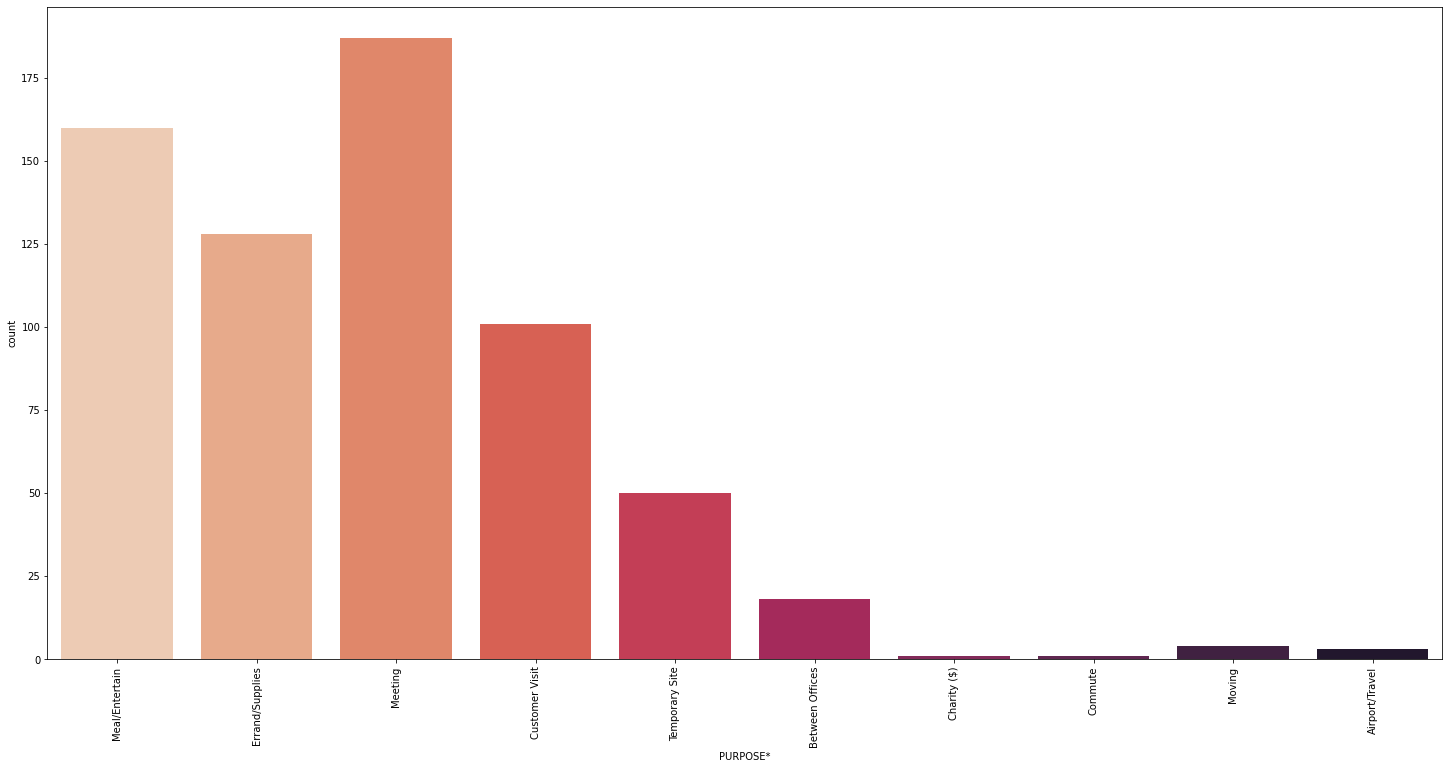

In [23]:
plt.figure(figsize=(25,12))
sns.countplot(x='PURPOSE*',data=df,palette='rocket_r')
order=df['PURPOSE*'].value_counts().index
plt.xticks(rotation=90)
plt.show()

In [27]:
df['PURPOSE*'].value_counts().head(20)

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

As one can see the Meetings top the list of the purpose of the uber rides, followed by Meal/Entertainment and Errand/Supplies.

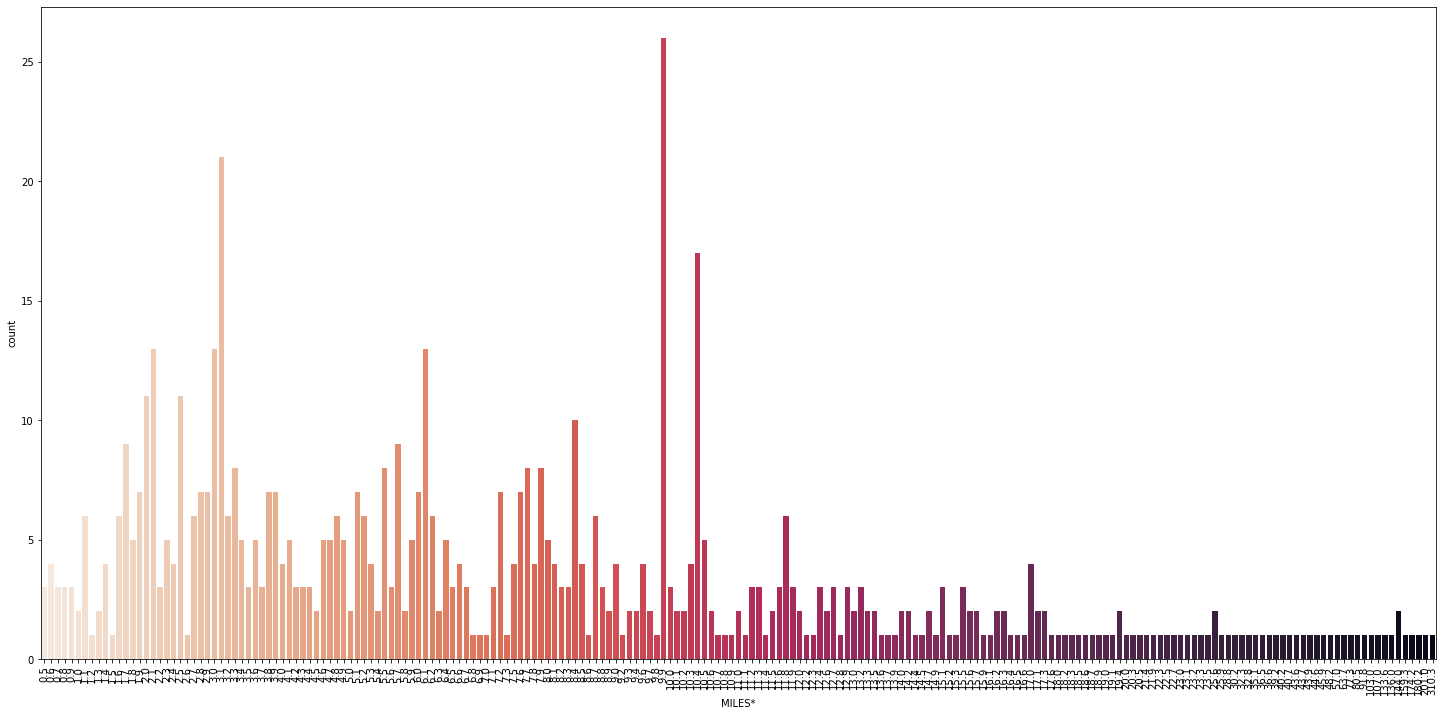

In [29]:
plt.figure(figsize=(25,12))
sns.countplot(x='MILES*',data=df,palette='rocket_r')
order=df['MILES*'].value_counts().index
plt.xticks(rotation=90)
plt.show()

In [30]:
df['MILES*'].value_counts().head(20)

9.9     26
3.1     21
10.4    17
3.0     13
6.1     13
2.1     13
2.0     11
2.5     11
8.4     10
5.7      9
1.7      9
3.3      8
7.9      8
7.7      8
5.5      8
6.0      7
7.6      7
7.2      7
3.9      7
5.1      7
Name: MILES*, dtype: int64